<a href="https://colab.research.google.com/github/Vladm0z/hse_hw4_scRNA_seq/blob/main/HW4_scRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка необходимых пакетов и импорт библиотек

In [ ]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [ ]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  Url = str('https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278' + gsm + '/suppl/GSM278' + gsm + '%5FAB' + ab + '%2Etxt%2Egz')
  !wget -c -nv $Url
  filename = str('GSM278' + gsm + '_AB' + ab + '.txt.gz')
  !gzip -f -d $filename

2022-05-09 10:10:24 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017%5FAB1395%2Etxt%2Egz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2022-05-09 10:10:25 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018%5FAB1396%2Etxt%2Egz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2022-05-09 10:10:26 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019%5FAB1398%2Etxt%2Egz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2022-05-09 10:10:27 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020%5FAB1458%2Etxt%2Egz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2022-05-09 10:10:28 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021%5FAB1459%2Etxt%2Egz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2022-05-09 10:10:29 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022%5FAB1539%2Etxt%2Egz [34815

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [ ]:
import glob2

lst = []

for filename in glob2.glob('/content/*'):
    if str(filename) == '/content/sample_data':
        continue
    df1 = pd.read_csv(str(filename), sep='\t')
    lst.append(df1)

counts = pd.concat(lst, axis=1)

counts

,W340241,W340242,W340243,W340244,W340245,W340246,W340247,W340248,W340249,W340250,...,W416263,W416264,W416265,W416266,W416267,W416268,W416269,W416270,W416271,W416272
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0610007L01Rik,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [ ]:
# choose only cells from the provided file

url='https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep='\t')
df = df.rename(columns={"Unnamed: 0": "cells", "clust": "clust", "group": "group"})
df

,cells,clust,group
0,W160351,2,mTEC-IV
1,W160352,32,mTEC-III
2,W160353,35,mTEC-II
3,W160357,34,mTEC-II
4,W160358,3,mTEC-IV
...,...,...,...
2336,W271100,30,mTEC-II
2337,W271101,23,mTEC-III
2338,W271102,35,mTEC-II
2339,W271106,20,mTEC-I


In [ ]:
intersection = set(pd.unique(df.cells)).intersection(set(pd.unique(counts.columns)))
inter = counts.loc[:, intersection]
inter

,W291845,W291946,W416521,W291734,W291869,W314916,W292351,W340791,W292302,W431489,...,W339870,W292350,W291933,W339882,W379078,W416533,W291947,W340751,W379137,W340366
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,1,0
0610007L01Rik,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [ ]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

for column in inter:
    inter[column] = (1e6/inter[column].sum())*inter[column]
inter

,W291845,W291946,W416521,W291734,W291869,W314916,W292351,W340791,W292302,W431489,...,W339870,W292350,W291933,W339882,W379078,W416533,W291947,W340751,W379137,W340366
0610005C13Rik,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0610007C21Rik,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,459.770115,0.0,0.0,0.0,0.0,418.935903,0.0,108.119797,0.0
0610007L01Rik,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,848.896435,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,418.935903,0.0,0.000000,0.0
0610007P08Rik,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0610007P14Rik,503.778338,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
snoZ178,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
snoZ39,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
snoZ40,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
columns_inter = set(df.cells).intersection(set(counts.columns))
counts_inter = counts.loc[:, columns_inter]
counts_mark = counts_inter.loc[markers, :]

In [ ]:
sort_counts = counts_mark.copy()
sort_counts.loc['group', :] = 0
cells_group = df.set_index('cells').T[columns_inter]

sort_counts.loc['group', :] = cells_group.loc['group', :]
sort_counts.sort_values(by=['group'], axis=1, inplace=True)

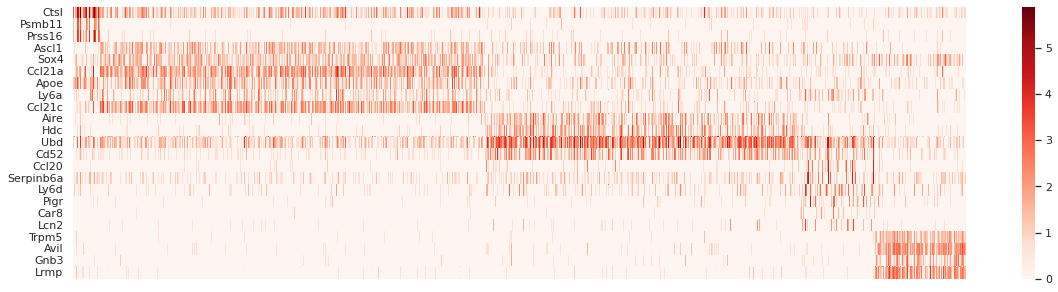

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(sort_counts.drop(index=['group']).astype(float) + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [ ]:
# counts_norm - normalized data

adata = ad.AnnData(inter.T)
sc.pp.log1p(adata)
# adata.var_names = list(inter.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# add to metadata cell type provided by authors

In [ ]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_group.loc['group', :].values

In [ ]:
sc.pp.pca(adata, n_comps=50)

In [ ]:
colors = ['red', 'green', 'blue', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

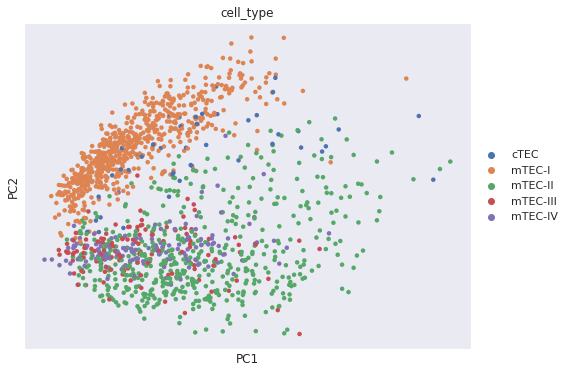

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


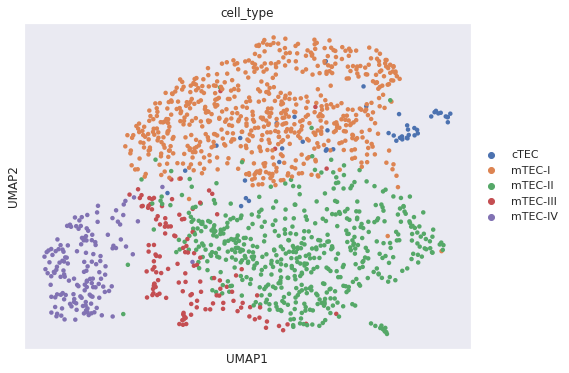

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()